# Relation between two variables

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In this notebook we will talk about measures of relation between two variables. But first of all we have to introduce all the type of features that exists.

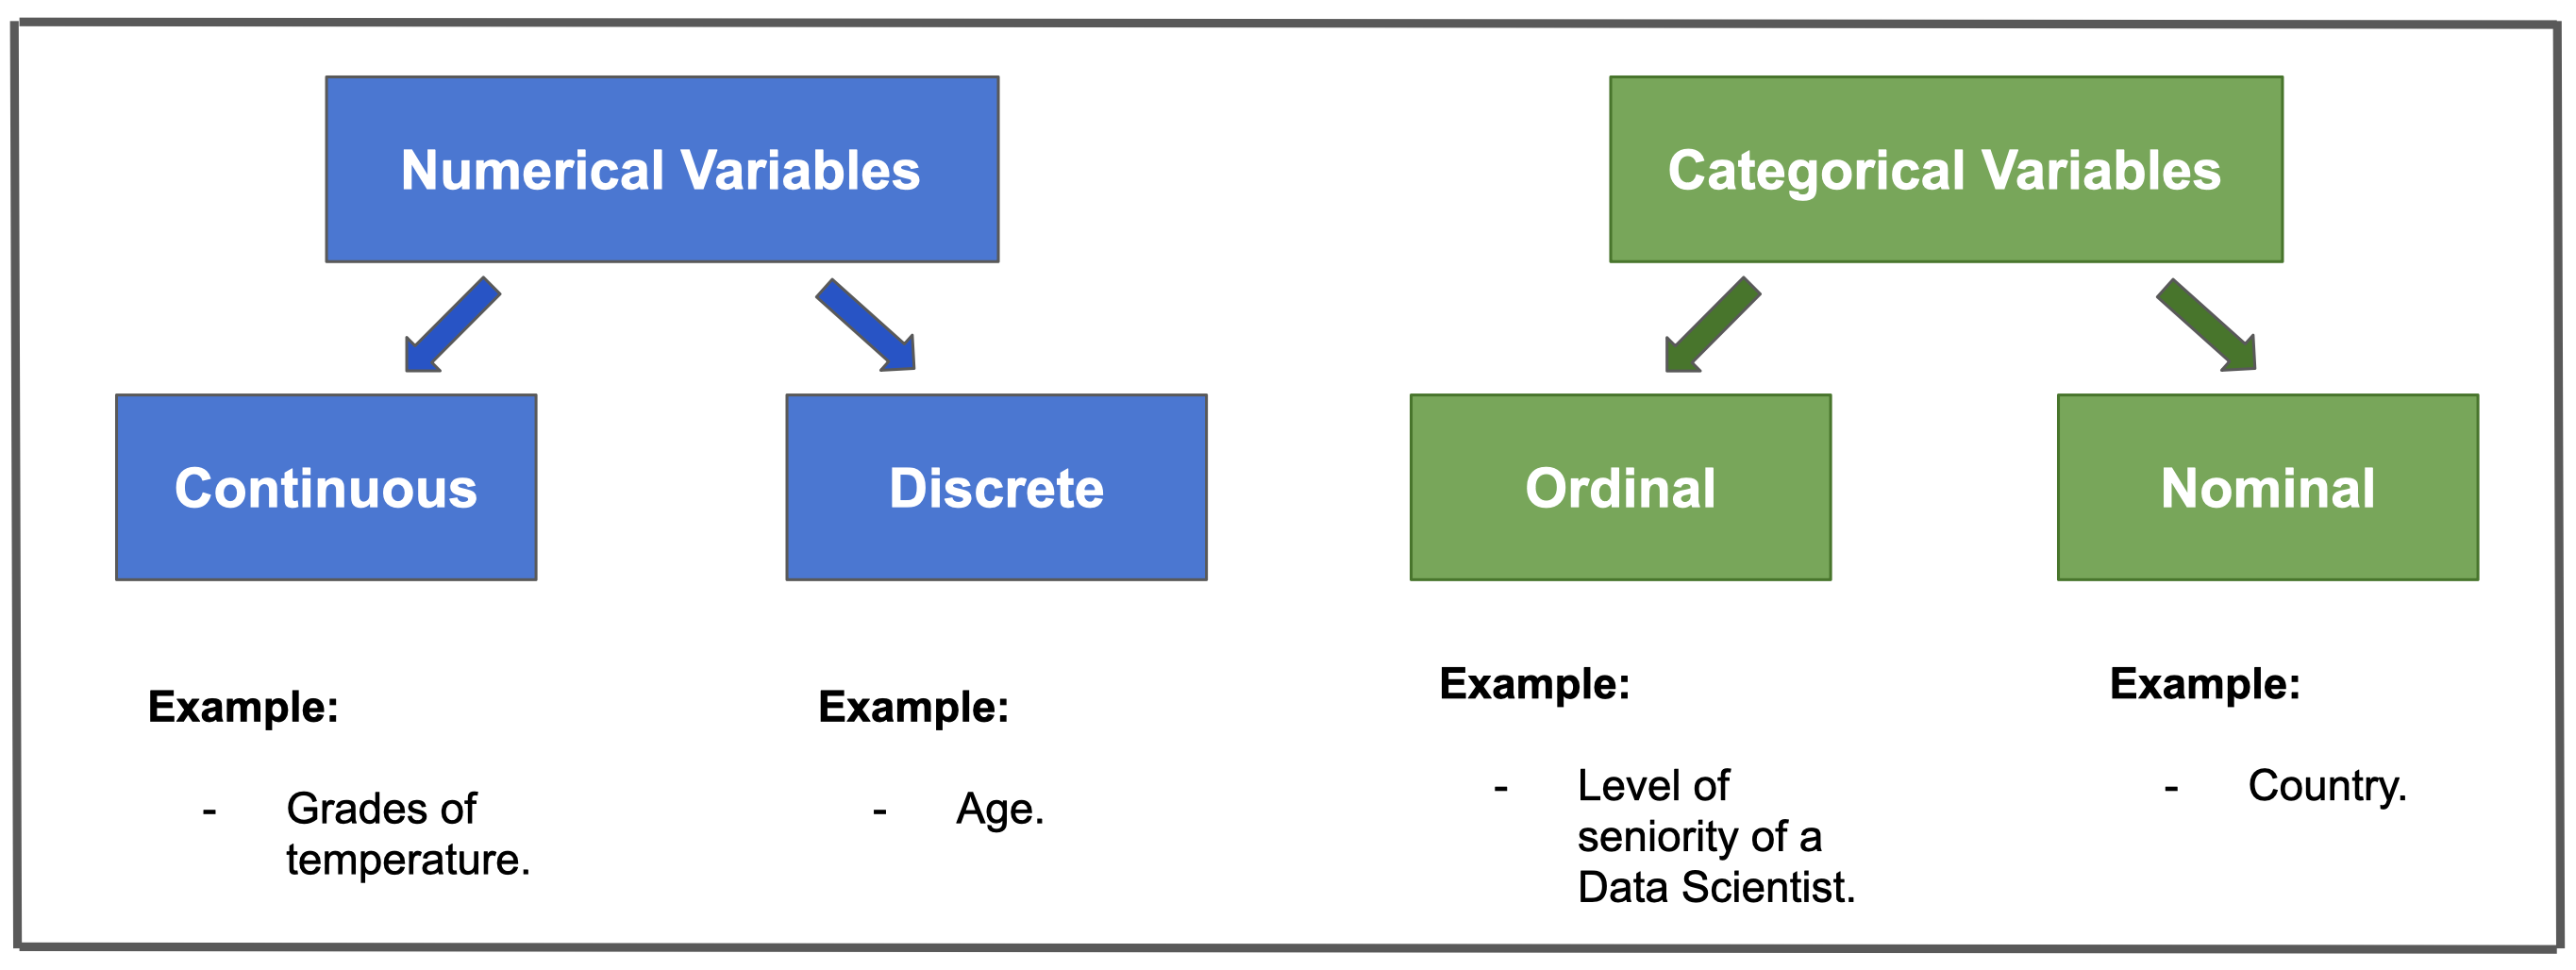

As you can see roughly we have two types of features: Numerical and Categorical. Therefore exists three possibles situations to measure the relation between two variables:

$ \ $ 

**1. Numerical with Numerical:** 

Here we use:


i. Pearson Correlation.

ii. Spearman Correlation.

iii. Variance Inflation Factor. 

$ \ $ 

**2. Categorial with Categorical:**

i. Chi-Squared Test.

ii. Mutual Information.

$ \ $ 

**3. Continous with Categorical:**

i. ANOVA.

**Note:** To board this situation we can use alternatives ways like:

a. Encode the categorical variable and then use numerical/numerical measures.

b. Discretice the numerical variable and then use categorical/categorical measures.


## 1. Numerical with Numerical

### i. Pearson Correlation

To check if two numerical variables have a "Linear Relation" we use this correlation.

### Theorical Definition

If we consider two random variables, $X$ and $Y$ then the correlation is:

$ corr(X, Y) = \rho_{X, Y} = \cfrac{Cov(X, Y)}{\sigma_x \cdot \sigma_y} $

If for the random variable $X$ we have the observations $x_1, x_2, ..., x_n$ and for the random variable $Y$ we have the observatinos $y_1, y_2, ..., y_n$ then the sample correlation is:

$ corr(X, Y) = \hat{\rho}_{X, Y} = \cfrac{\sum_{i=1}^n (x_i - \bar{x}) \cdot (y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}} $

### Example with dataset

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('supermarket_sales.csv')

**Pearson Matrix**

In [3]:
round(df[['Unit price', 'Rating', 'Total']].corr()*100, 2)

,Unit price,Rating,Total
Unit price,100.00,-0.88,63.40
Rating,-0.88,100.00,-3.64
Total,63.40,-3.64,100.00


In [4]:
!pip install -q jinja2

In [5]:
corr = df[['Unit price', 'Rating', 'Total']].corr()
corr.style.background_gradient(cmap='coolwarm')

,Unit price,Rating,Total
Unit price,1.000000,-0.008778,0.633962
Rating,-0.008778,1.000000,-0.036442
Total,0.633962,-0.036442,1.000000


### Notable Fact

If in addition to $X$ and $Y$ we consider the random variables $ U = a \cdot X + b $, $ \ V = c \cdot Y  + d \ $ then the absolute value of the correlation between $X$ and $Y$ are equal to the absolute value of the correlation between $U$ and $V$. 
$ \ $

Note that a paricular case is $ a = \cfrac{1}{\sigma_X} $, $ b = - \cfrac{\mathbb{E}(X)}{\sigma_X} $, $ c = \cfrac{1}{\sigma_Y} $, $ d = - \cfrac{\mathbb{E}(Y)}{\sigma_Y} $ $ \ $ i.e. **normalization of the variables**.

**Proof:**

**i. Theorical Correlation**

$ \ $

We known that:

$ \rho_{X, Y} = \cfrac{Cov(X, Y)}{\sqrt{Var(X)} \cdot \sqrt{Var(Y)}} $

$ \ $

Therefore:

$ \rho_{U, V} = \cfrac{Cov(U, V)}{\sqrt{Var(U)} \cdot \sqrt{Var(V)}} $ 

$ \ $

If we analyze each term we have:

$ \ $

$ Cov(U, V) = Cov(a \cdot X + b, V) = Cov(a \cdot X, V) = a \cdot Cov(X, V) = a \cdot \left[ Cov(X, c \cdot Y + d) \right] = a \cdot \left[ Cov(X, c \cdot Y) \right] = a \cdot \left[ c \cdot Cov(X, Y) \right] = a \cdot c \cdot Cov(X, Y)$

$ Var(U) = Var(a \cdot X + b) = Var(a \cdot X) = a^2 \cdot Var(X) $

$ Var(V) = Var(c \cdot Y + d) = Var(c \cdot Y) = c^2 \cdot Var(Y) $

$ \ $

Replacing in $ \rho_{U, V} $ we have:

$ \ $

$ \rho_{U, V} = \cfrac{Cov(U, V)}{\sqrt{Var(U)} \cdot \sqrt{Var(V)}} = \cfrac{a \cdot c \cdot Cov(X, Y)}{\sqrt{a^2 \cdot Var(X)} \cdot \sqrt{c^2 \cdot Var(Y)}} = \cfrac{a}{|a|} \cdot \cfrac{c}{|c|} \cdot \cfrac{Cov(X, Y)}{\sqrt{Var(X)} \cdot \sqrt{Var(Y)}} = sign(a) \cdot sign(c) \cdot \rho_{X, Y} $ 

$ \ $

$ \Rightarrow \ \ \ \rho_{U, V} = sign(a) \cdot sign(c) \cdot \rho_{X, Y} \ \ \ \Rightarrow \ \ \ |\rho_{U, V}| = |sign(a)| \cdot |sign(c)| \cdot |\rho_{X, Y}| = |\rho_{X, Y}| \ \ \ \Rightarrow \ \ \ |\rho_{U, V}| = |\rho_{X, Y}|$ 

$ \ $

**ii. Sample Correlation**

$ \ $

We known that:

$ \hat{\rho}_{X, Y} = \cfrac{\sum_{i=1}^n (x_i - \bar{x}) \cdot (y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}} $

$ \ $

Therefore:

$ \hat{\rho}_{U, V} = \cfrac{\sum_{i=1}^n (u_i - \bar{u}) \cdot (v_i - \bar{v})}{\sqrt{\sum_{i=1}^n (u_i - \bar{u})^2} \cdot \sqrt{\sum_{i=1}^n (v_i - \bar{v})^2}} $

$ \ $

If we analyze each term we have:

$ \ $

$ u_i = a \cdot x_i + b \ \ \ \Rightarrow \ \ \ \bar{u} = a \cdot \bar{x} + b \ \ \ \Rightarrow \ \ \ u_i - \bar{u} = (a \cdot x_i + b) - (a \cdot \bar{x} + b) = a \cdot (x_i - \bar{x}) \ \ \ \Rightarrow \ \ \ (u_i - \bar{u}) = a \cdot (x_i - \bar{x}) $

$ v_i = c \cdot y_i + d \ \ \ \Rightarrow \ \ \ \bar{v} = c \cdot \bar{y} + d \ \ \ \Rightarrow \ \ \ v_i - \bar{v} = (c \cdot y_i + d) - (c \cdot \bar{y} + d) = c \cdot (y_i - \bar{y}) \ \ \ \Rightarrow \ \ \ (v_i - \bar{v}) = c \cdot (y_i - \bar{y}) $

$ \ $

Replacing in $ \hat{\rho}_{U, V} $ we have:

$ \ $

$ \hat{\rho}_{U, V} = \cfrac{\sum_{i=1}^n (u_i - \bar{u}) \cdot (v_i - \bar{v})}{\sqrt{\sum_{i=1}^n (u_i - \bar{u})^2} \cdot \sqrt{\sum_{i=1}^n (v_i - \bar{v})^2}} =  \cfrac{\sum_{i=1}^n a \cdot (x_i - \bar{x}) \cdot c \cdot (y_i - \bar{y})}{\sqrt{\sum_{i=1}^n a^2 \cdot (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^n c^2 \cdot (y_i - \bar{y})^2}} = \cfrac{a}{|a|} \cdot \cfrac{c}{|c|} \cdot \cfrac{\sum_{i=1}^n (x_i - \bar{x}) \cdot (y_i - \bar{y})}{\sqrt{\sum_{i=1}^n (x_i - \bar{x})^2} \cdot \sqrt{\sum_{i=1}^n (y_i - \bar{y})^2}} = sign(a) \cdot sign(c) \cdot \hat{\rho}_{X, Y} $

$ \ $

$ \Rightarrow \ \ \ \hat{\rho}_{U, V} = sign(a) \cdot sign(c) \cdot \hat{\rho}_{X, Y} \ \ \ \Rightarrow \ \ \ |\hat{\rho}_{U, V}| = |sign(a)| \cdot |sign(c)| \cdot |\hat{\rho}_{X, Y}| = |\hat{\rho}_{X, Y}| \ \ \ \Rightarrow \ \ \ |\hat{\rho}_{U, V}| = |\hat{\rho}_{X, Y}|$ 

### ii. Spearman Correlation

To check if two numerical variables have a "Monotonic Relation" we use this correlation. This correlation is more general than Pearson Correlation. 

$ \\ $

The steps to compute this correlation is first of all create the random variables $R(X)$ and $R(Y)$ which represents the ranking of both variables. 

$ \\ $

Then we have that:

$ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ SpearmanCorr_{X, Y} = corr_{R(X), R(Y)} \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ $

### Example 1:

Consider two variables with a monotonic - no linear relation.

In [6]:
X = []
y = []

for i in range(-10, 10):

    noise = np.random.uniform(-0.5, 0.5)

    X.append(i)
    y.append(1/(1 + math.exp(-i)))

df_s = pd.DataFrame()
df_s['X'] = X
df_s['y'] = y

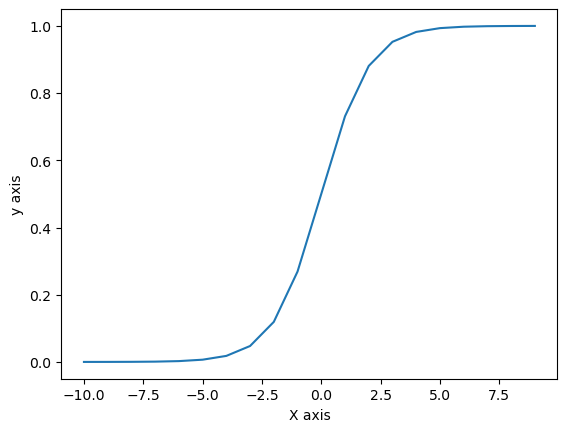

In [7]:
plt.plot(df_s['X'], df_s['y'])

plt.xlabel('X axis')
plt.ylabel('y axis')

plt.show()

**Pearson correlation:**

In [8]:
round(df_s['X'].corr(df_s['y'])*100, 2)

93.58

**Spearman correlation**

In [9]:
df_s['X_rank'] = df_s['X'].rank()
df_s['y_rank'] = df_s['y'].rank()

In [10]:
round(df_s['X_rank'].corr(df_s['y_rank'])*100, 2)

100.0

### Example 2:

Consider two variables with linear relation.

In [11]:
X = []
y = []

for i in range(-10, 10):

    noise = np.random.uniform(-2, 2)

    X.append(i)
    y.append(3*(i + noise) - 2)

df_s = pd.DataFrame()
df_s['X'] = X
df_s['y'] = y

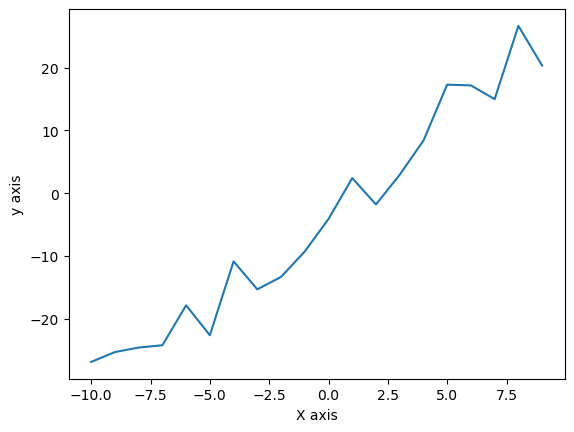

In [12]:
plt.plot(df_s['X'], df_s['y'])

plt.xlabel('X axis')
plt.ylabel('y axis')

plt.show()

**Pearson correlation:**

In [13]:
round(df_s['X'].corr(df_s['y'])*100, 2)

97.63

**Spearman correlation**

In [14]:
df_s['X_rank'] = df_s['X'].rank()
df_s['y_rank'] = df_s['y'].rank()

In [15]:
round(df_s['X_rank'].corr(df_s['y_rank'])*100, 2)

98.5

**Comments** As you can see, Spearman correlation works very well in linear relation and monotonic-no linear relation.

### iii. Variance Inflation Factor (VIF)

This metric is very useful to measure **Multicorrelation**. As greater is VIF as bigger is the multicorrelation.

$ \ $

The convention is a that a value greather than 10 indicates multicorrelation, but we can be more conservative too.

$ \ $

$ VIF_i = \cfrac{1}{1 - R_i^2} $

Where $ R_i^2 $ = Unadjusted coefficient of determination for regressing the $ith$ independent variable on the remainning ones.

$ R_i^2 = 1 - \cfrac{\sum (y_i - \hat{y_i})^2}{\sum (y_i - \bar{y_i})^2} $

In [16]:
df = pd.read_csv('BMI.csv')

In [17]:
df['Gender'] = df['Gender'].map({'Male':0, 'Female':1})

In [18]:
!pip install -q statsmodels

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [20]:
X = df[['Gender', 'Height', 'Weight']]

In [21]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

In [22]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [23]:
vif_data[['feature', 'VIF']]

,feature,VIF
0,Gender,2.028864
1,Height,11.623103
2,Weight,10.688377


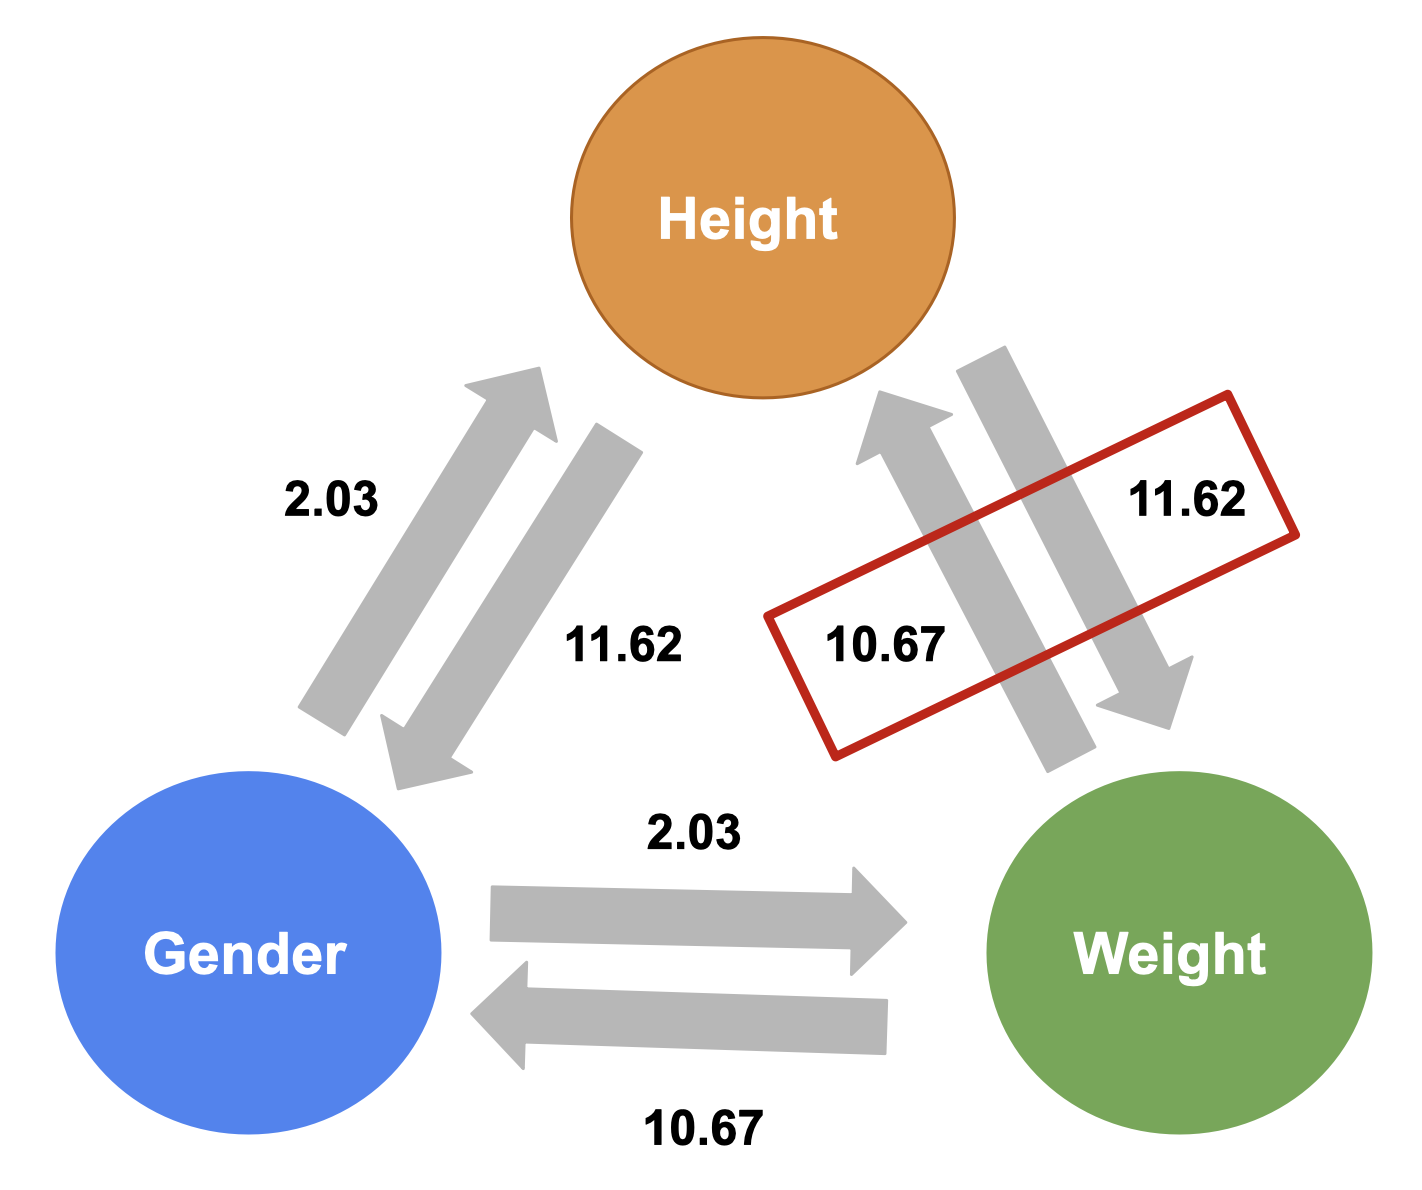

**Comments:** As we can see, height and weight have very high values of VIF, indicating that these two variables are highly correlated. This is expected as the height of a person does influence their weight. Hence, considering these two features together leads to a model with high multicollinearity.

## 2. Categorical with Categorical

### i. Chi-square Test

For categorical variables we use Chi - Square test.

$ H_0: $ The two variables are independent. Thus the events generated by them are too.
$ \ $

$ H_a: $ The two variable aren't independent.

### Example 1

We will analyze the random variables $ \ Branch \ $ and $ \ City \ $. First of all we get the **observed** frequency table of the two variables:

In [24]:
df = pd.read_csv('supermarket_sales.csv')

In [25]:
pd.crosstab(df['Branch'], df['City'])

City,Mandalay,Naypyitaw,Yangon
Branch,,,
A,0,0,340
B,332,0,0
C,0,328,0


If we assume $H_0$ then the variables $ Branch $ and $ City $ are independents, thus to obtain the **expected** frequency table we have to compute:

In [26]:
p_1_A = df['Branch'].value_counts(normalize = True)['A']
p_1_B = df['Branch'].value_counts(normalize = True)['B']
p_1_C = df['Branch'].value_counts(normalize = True)['C']

print(p_1_A, p_1_B, p_1_C)

0.34 0.332 0.328


In [27]:
p_2_A = df['City'].value_counts(normalize = True)['Mandalay']
p_2_B = df['City'].value_counts(normalize = True)['Naypyitaw']
p_2_C = df['City'].value_counts(normalize = True)['Yangon']

print(p_2_A, p_2_B, p_2_C)

0.332 0.328 0.34


In [28]:
N = pd.crosstab(df['Branch'], df['City']).sum().sum()

print(N)

1000


In [29]:
col_A_obs = pd.Series([0, 332, 0])
col_B_obs = pd.Series([0, 0, 328])
col_C_obs = pd.Series([340, 0, 0])

In [30]:
col_A_exp = pd.Series([p_2_A*p_1_A*N, p_2_A*p_1_B*N, p_2_A*p_1_C*N])
col_B_exp = pd.Series([p_2_B*p_1_A*N, p_2_B*p_1_B*N, p_2_B*p_1_C*N])
col_C_exp = pd.Series([p_2_C*p_1_A*N, p_2_C*p_1_B*N, p_2_C*p_1_C*N])

This is a **Chi-squared test** and for this reason we will use the next **test statistic**:
$ \ $


$ T = \sum_{i=1}^n \cfrac{(O_i - E_i)^2}{E_i} \sim \chi^2_{k} $ 
$ \ $

where $ k = (\text{number of rows} - 1) \cdot (\text{number of columns} - 1) $

In [31]:
T = ((col_A_obs - col_A_exp)**2/col_A_exp).sum() + ((col_B_obs - col_B_exp)**2/col_B_exp).sum() + ((col_C_obs - col_C_exp)**2/col_C_exp).sum()

In [32]:
T

2000.0

In [33]:
k = (3-1)*(3-1)

In [34]:
k

4

In [35]:
import scipy

In [36]:
alpha = 5/100
V = scipy.stats.chi2.ppf(1 - alpha, df = k)

In [37]:
V

9.487729036781154

In [38]:
T > V

True

How $ T > V $ we can reject the null hypothesis with $95 \% $ of confidence.

### Example 2

We will analyze the random variables $ \ Gender \ $ and $ \ Customer type \ $. First of all we get the **observed** frequency table of the two variables:

In [39]:
pd.crosstab(df['Gender'], df['Customer type'])

Customer type,Member,Normal
Gender,,
Female,261,240
Male,240,259


If we assume $H_0$ then the variables $ Gender $ and $ Customer \ type $ are independents, thus to obtain the **expected** frequency table we have to compute:

In [40]:
p_1_A = df['Gender'].value_counts(normalize = True)['Female']
p_1_B = df['Gender'].value_counts(normalize = True)['Male']

print(p_1_A, p_1_B)

0.501 0.499


In [41]:
p_2_A = df['Customer type'].value_counts(normalize = True)['Member']
p_2_B = df['Customer type'].value_counts(normalize = True)['Normal']

print(p_2_A, p_2_B)

0.501 0.499


In [42]:
N = pd.crosstab(df['Gender'], df['Customer type']).sum().sum()

print(N)

1000


In [43]:
col_A_obs = pd.Series([261, 240])
col_B_obs = pd.Series([240, 259])

In [44]:
col_A_exp = pd.Series([p_2_A*p_1_A*N, p_2_A*p_1_B*N])
col_B_exp = pd.Series([p_2_B*p_1_A*N, p_2_B*p_1_B*N])

This is a **Chi-squared test** and for this reason we will use the next **test statistic**:
$ \ $


$ T = \sum_{i=1}^n \cfrac{(O_i - E_i)^2}{E_i} \sim \chi^2_{k} $ 
$ \ $

where $ k = (\text{number of rows} - 1) \cdot (\text{number of columns} - 1) $

In [45]:
T = ((col_A_obs - col_A_exp)**2/col_A_exp).sum() + ((col_B_obs - col_B_exp)**2/col_B_exp).sum()

In [46]:
T

1.599692813516914

In [47]:
k = (2-1)*(2-1)

In [48]:
k

1

In [49]:
alpha = 5/100
V = scipy.stats.chi2.ppf(1 - alpha, df = k)

In [50]:
V

3.841458820694124

In [51]:
T > V

False

How $ T < V $ we can't reject the null hypothesis with $95 \% $ of confidence.

### Important Notes

1. If correlation is 0 between two continouos variables, not necessarily are independents. If the two variables are normal, then the implication ($ correlation = 0  \Rightarrow  independence $) is valid.
$ \ $

2. In general terms, we can normalize categorical variables once we did transform to a numeric encoding, however its a matter of debate. The impact of normalising/no normalising depends of the model.

### ii. Mutual information

To introduce the mutual information first of all we have to introduce the entropy:

$ \ $

**Entropy:** The entropy of a variable is a measure of the information, or alternatively, the "uncertainty" of the variable's possibles values. 

$ \ $

$ H(X) = - \sum_{x \in X} p(x) \cdot log_2(p(x)) $

$ \ $

Example for a fair coin toss we have:

$ H(X) = - \cfrac{1}{2} \cdot log_2 \left( \frac{1}{2} \right) - \cfrac{1}{2} \cdot log_2 \left( \frac{1}{2} \right) = 1 $

In [52]:
from scipy.stats import entropy

In [53]:
coin_toss = [0.5, 0.5]
entropy(coin_toss, base=2)

1.0

**Relative Entropy:** The relative entropy measures the distance between two distributions and it is also called Kullback-Leibler distance. It is given by:

$ \ $

$ D(p|q) = \sum_{x \in X} \sum_{y \in Y}  p(x) \cdot log_2 \left( \cfrac{p(x)}{q(y)} \right) $

Where $p(x)$ and $q(x)$ are two probability distributions.

$ \ $

**Mutual Information:** Utilizing the relative entropy, we can now define the MI. We define the MI as the relative entropy between the joint distribution of the two variables and the product of their marginal distributions.

$ I(X, Y) = \sum_{x \in X} \sum_{y \in Y} p(x, y) \cdot log_2 \left( \cfrac{p(x,y)}{p(x) \cdot p(y)} \right) $

### Example

We will analyze the random variables $ \ Gender \ $ and $ \ Customer type \ $. First of all we get the **observed** frequency table of the two variables:

In [54]:
pd.crosstab(df['Gender'], df['Customer type'])

Customer type,Member,Normal
Gender,,
Female,261,240
Male,240,259


In [55]:
p_fem_mem = 261/(261 + 240 + 240 + 259)
p_fem_nor = 240/(261 + 240 + 240 + 259)
p_men_mem = 240/(261 + 240 + 240 + 259)
p_men_nor = 259/(261 + 240 + 240 + 259)

In [56]:
p_fem = p_fem_mem + p_fem_nor
p_men = p_men_mem + p_men_nor
p_nor = p_fem_nor + p_men_nor
p_mem = p_fem_mem + p_men_mem

In [57]:
log = math.log

In [58]:
MI = p_fem_mem*log(p_fem_mem/(p_fem*p_mem)) + p_fem_nor*log(p_fem_nor/(p_fem*p_nor)) + p_men_mem*log(p_men_mem/(p_men*p_mem)) + p_men_nor*log(p_men_nor/(p_men*p_nor)) 

In [59]:
MI

0.0008000596306460134

We also can use the python libraries to compute this values

In [60]:
from sklearn.metrics import mutual_info_score

In [61]:
MI_of = mutual_info_score(df['Gender'], df['Customer type'])

In [62]:
MI_of

0.0008000596306457775

**Comments:** Mutual information is always larger than or equal to zero, where the larger the value, the greater the relationship between the two variables. If the calculated result is zero, then the variables are independent.

## 3. Numerical with Categorical

### i. ANOVA

First of all we have to create different groups based in the categorical variables. Then we want to check if there is a difference in the means of the continuos variables between the groups.

$ H_0: \bar{x_1} = \bar{x_2} = ... = \bar{x_k} $ 


$ H_A: $ At least one of the groups means differ.

$ F = \cfrac{MS_B}{MS_W} $

Where:

$ MS_B = \cfrac{SS_B}{(k-1)} \ \ \ \ \ \ \ \ \ \  (k-1) $ degrees of freedom 

$ MS_W = \cfrac{SS_W}{(n_T-k)} \ \ \ \ \ \ \ \ \ \ (n_T-k) $ degrees of freedom

$  $

$ k = $ Number of groups.

$ n_T $ Total number of observations.

$  $

$ SS_B = \sum_{k} n_k \cdot (\bar{x}_k - \bar{x})^2 $

$ SS_W = \sum_{k} (n_k - 1) \cdot S_k^2 $

$ TSS = SS_B + SS_W $

degrees of freedom $ = n_T - 1 $


In [63]:
df = pd.DataFrame()

In [64]:
df['Libido'] = [3, 2, 1, 1, 4, 5, 2, 4, 2, 3, 7, 4, 5, 3, 6]
df['Group'] = ['Placebo', 'Placebo', 'Placebo', 'Placebo', 'Placebo', 
               'Low', 'Low', 'Low', 'Low', 'Low',
               'High', 'High', 'High', 'High', 'High']

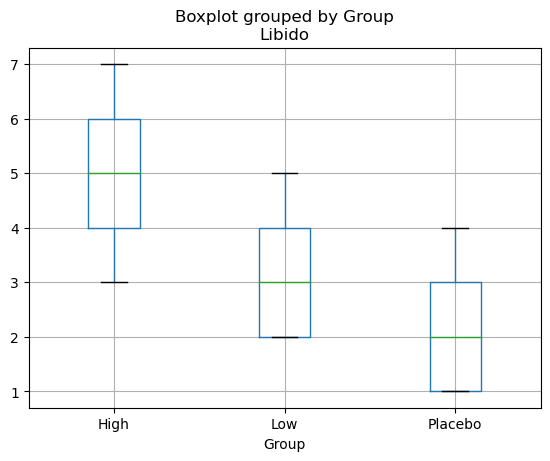

In [65]:
df.boxplot('Libido', by = 'Group')
plt.show()

In [66]:
k = 3

S_1 = df[df['Group'] == 'Placebo']['Libido'].std()
S_2 = df[df['Group'] == 'Low']['Libido'].std()
S_3 = df[df['Group'] == 'High']['Libido'].std()

In [67]:
n_1 = (df['Group'] == 'Placebo').sum()
n_2 = (df['Group'] == 'Low').sum()
n_3 = (df['Group'] == 'High').sum()

In [68]:
n_T = len(df)

In [69]:
bar_x = df['Libido'].mean()

bar_x_1 = df[df['Group'] == 'Placebo']['Libido'].mean()
bar_x_2 = df[df['Group'] == 'Low']['Libido'].mean()
bar_x_3 = df[df['Group'] == 'High']['Libido'].mean()

In [70]:
SS_W = (n_1 - 1)*(S_1**2) + (n_2 - 1)*(S_2**2) + (n_3 - 1)*(S_3**2)

In [71]:
SS_B = n_1*((bar_x_1 - bar_x)**2) + n_2*((bar_x_2 - bar_x)**2) + n_3*((bar_x_3 - bar_x)**2)

In [72]:
MS_B = SS_B/(k - 1)

In [73]:
MS_W = SS_W/(n_T - k)

In [74]:
F_stat = MS_B/MS_W

In [75]:
F_stat

5.11864406779661

In [76]:
alpha = 0.05

In [77]:
cdf = scipy.stats.f.cdf(F_stat, k - 1, n_T - k)

In [78]:
cdf

0.9753057104617774

In [79]:
p_value = 1 - cdf

In [80]:
p_value

0.024694289538222614

In [81]:
p_value < alpha

True

**Comments:** As you can see we reject the $H_0$ hypothesis with 95 $ \% $ of confidence.

# Correlation vs Causation

Is important to know the difference between correlation and causation to can analize of a correct way the different problems we solve. 

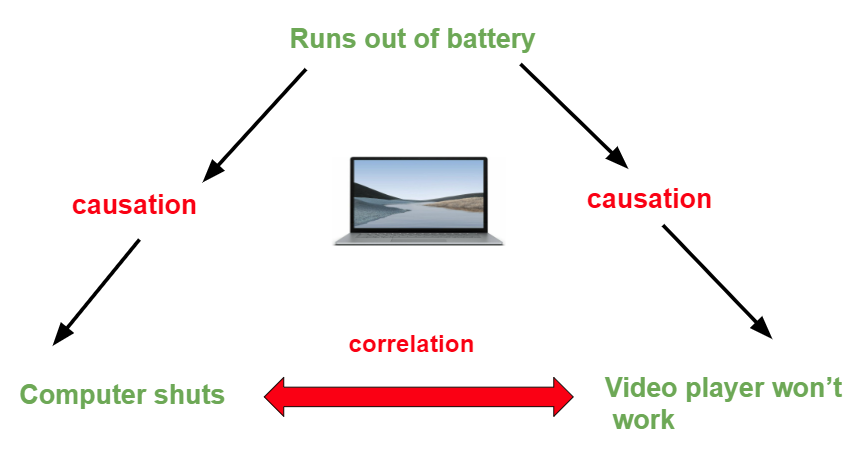

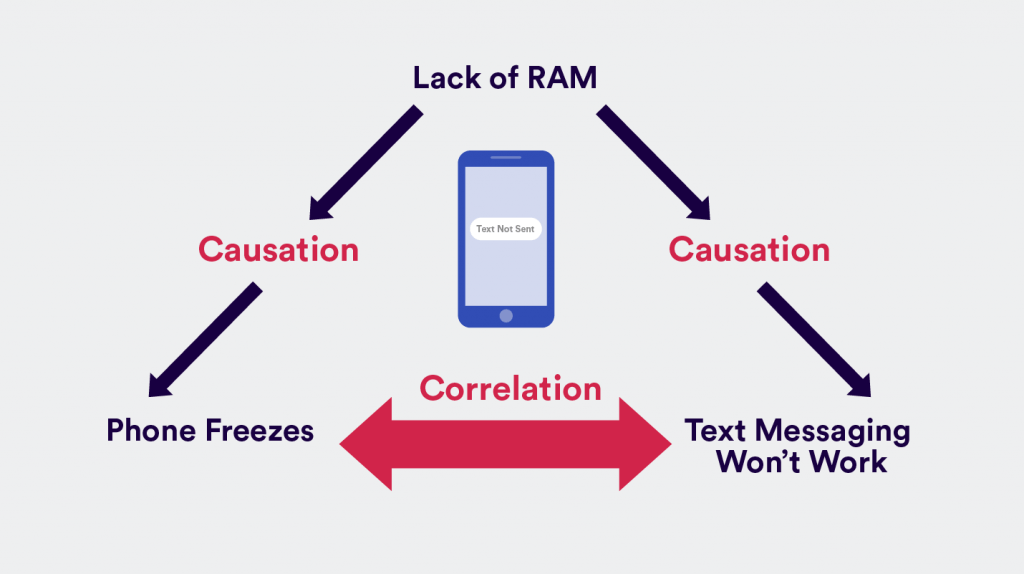